# This notebook focuses on analyzing stock market prices in relation to sentiment data. 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Step1:Load and formate the data for analysis

In [2]:
# Load stock data
stock_data=pd.read_csv(r"C:\Users\Priyanka\Desktop\StockMarket_SentimentalAnalysis\stock_data.csv")

In [3]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock Symbol
0,2022-02-18 00:00:00-05:00,2000.000000,2300.000000,1520.000000,2296.000000,3295,0,0.0,ONCO
1,2022-02-22 00:00:00-05:00,2700.000000,3636.000000,2004.000000,2278.800049,2683,0,0.0,ONCO
2,2022-02-23 00:00:00-05:00,1895.599976,2072.000000,1302.000000,1992.000000,1478,0,0.0,ONCO
3,2022-02-24 00:00:00-05:00,1600.800049,1780.000000,1459.199951,1712.199951,1080,0,0.0,ONCO
4,2022-02-25 00:00:00-05:00,1559.599976,1779.599976,1504.479980,1774.000000,903,0,0.0,ONCO


In [4]:
# Ensure price columns are in float format (you might have Open, High, Low, Close prices)
stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')

In [5]:
# Check the data types to ensure proper conversion
print(stock_data.dtypes)

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
Stock Symbol     object
dtype: object


In [6]:
# Preview the data
print(stock_data.head())

                        Date         Open         High          Low  \
0  2022-02-18 00:00:00-05:00  2000.000000  2300.000000  1520.000000   
1  2022-02-22 00:00:00-05:00  2700.000000  3636.000000  2004.000000   
2  2022-02-23 00:00:00-05:00  1895.599976  2072.000000  1302.000000   
3  2022-02-24 00:00:00-05:00  1600.800049  1780.000000  1459.199951   
4  2022-02-25 00:00:00-05:00  1559.599976  1779.599976  1504.479980   

         Close  Volume  Dividends  Stock Splits Stock Symbol  
0  2296.000000    3295          0           0.0         ONCO  
1  2278.800049    2683          0           0.0         ONCO  
2  1992.000000    1478          0           0.0         ONCO  
3  1712.199951    1080          0           0.0         ONCO  
4  1774.000000     903          0           0.0         ONCO  


## Create the Target Variable
The target variable is binary: 1 if the stock price increased compared to the previous day, and 0 otherwise. You can compare the Close Price of the current day to the previous day to create this target.

In [7]:
# Sort the data by 'Date' if not already sorted
stock_data = stock_data.sort_values(by=['Date'])

# Create the target variable 'Price Increase' (1 if today's price is greater than yesterday's)
stock_data['Price Increase'] = (stock_data['Close'].diff() > 0).astype(int)

# Preview the data with the new target variable
print(stock_data[['Date', 'Close', 'Price Increase']].head(10))


                           Date        Close  Price Increase
1339  2022-01-03 00:00:00-05:00  2560.000000               0
653   2022-01-03 00:00:00-05:00    87.900002               0
2641  2022-01-03 00:00:00-05:00    35.799999               0
654   2022-01-04 00:00:00-05:00    84.300003               1
2642  2022-01-04 00:00:00-05:00    35.000000               0
1340  2022-01-04 00:00:00-05:00  2368.000000               1
2643  2022-01-05 00:00:00-05:00    31.200001               0
655   2022-01-05 00:00:00-05:00    76.800003               1
1341  2022-01-05 00:00:00-05:00  2240.000000               1
2644  2022-01-06 00:00:00-05:00    31.200001               0


In [8]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock Symbol,Price Increase
1339,2022-01-03 00:00:00-05:00,2368.000000,2560.000000,2304.000000,2560.000000,3079,0,0.0,TNXP,0
653,2022-01-03 00:00:00-05:00,86.400002,90.300003,85.919998,87.900002,1250,0,0.0,CNEY,0
2641,2022-01-03 00:00:00-05:00,35.000000,36.599998,34.000000,35.799999,132995,0,0.0,KTTA,0
654,2022-01-04 00:00:00-05:00,87.000000,87.000000,82.800003,84.300003,937,0,0.0,CNEY,1
2642,2022-01-04 00:00:00-05:00,35.400002,36.000000,34.000000,35.000000,96925,0,0.0,KTTA,0


## Handling Missing Data:
Check for missing values and handle them (e.g., by removing rows with missing prices).

In [9]:
# Check for missing values
print(stock_data.isnull().sum())

Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
Dividends         0
Stock Splits      0
Stock Symbol      0
Price Increase    0
dtype: int64


In [10]:
print(stock_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Stock Symbol', 'Price Increase'],
      dtype='object')


In [11]:
# Function to convert date to ISO 8601 format, handling different formats
def convert_to_iso(date_str):
    try:
        # Try to convert assuming format "%b-%d-%y %I:%M%p"
        date_obj = pd.to_datetime(date_str, format="%b-%d-%y %I:%M%p")
    except ValueError:
        # If format doesn't match, let pandas infer it
        date_obj = pd.to_datetime(date_str, errors='coerce')  # Coerce invalid dates to NaT

    if pd.isnull(date_obj):
        return None
    else:
        return date_obj.strftime('%Y-%m-%d')

# Assuming 'Date' is the column name in the CSV containing the date strings
stock_data['Date'] = stock_data['Date'].apply(convert_to_iso)

print("Date column converted.")


Date column converted.


In [12]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock Symbol,Price Increase
1339,2022-01-03,2368.000000,2560.000000,2304.000000,2560.000000,3079,0,0.0,TNXP,0
653,2022-01-03,86.400002,90.300003,85.919998,87.900002,1250,0,0.0,CNEY,0
2641,2022-01-03,35.000000,36.599998,34.000000,35.799999,132995,0,0.0,KTTA,0
654,2022-01-04,87.000000,87.000000,82.800003,84.300003,937,0,0.0,CNEY,1
2642,2022-01-04,35.400002,36.000000,34.000000,35.000000,96925,0,0.0,KTTA,0


In [13]:
from datetime import datetime

In [14]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')


In [15]:
print(stock_data.dtypes)

Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                     int64
Dividends                  int64
Stock Splits             float64
Stock Symbol              object
Price Increase             int32
dtype: object


Step2:Load and formate the data for Merge and further analysis

In [16]:
# Load sentiment data
sentiment_data = pd.read_csv(r"C:\Users\Priyanka\Desktop\StockMarket_SentimentalAnalysis\news_sentiment_data.csv")

In [17]:
sentiment_data.head()

,Date,Headline,Sentiment,Stock Symbol
0,Sep-20-24 11:45AM,"Onconetix, Inc. Announces 1-for-40 Reverse Sto...",0.0000,ONCO
1,Jul-15-24 06:00AM,Onconetix Announces Closing of Warrant Exercis...,-0.4767,ONCO
2,Jul-11-24 08:17AM,Onconetix Announces Exercise of Warrants for $...,-0.4767,ONCO
3,May-30-24 07:47AM,Today's Biggest Pre-Market Stock Movers: 10 To...,-0.3818,ONCO
4,May-21-24 09:52AM,ONCO Stock Earnings: Onconetix Reported Result...,0.0000,ONCO


In [18]:

# Function to convert date to ISO 8601 format, handling different formats
def convert_to_iso(date_str):
    try:
        # Try to convert assuming format "%b-%d-%y %I:%M%p"
        date_obj = pd.to_datetime(date_str, format="%b-%d-%y %I:%M%p")
    except ValueError:
        # If format doesn't match, let pandas infer it
        date_obj = pd.to_datetime(date_str, errors='coerce')  # Coerce invalid dates to NaT

    if pd.isnull(date_obj):
        return None
    else:
        return date_obj.strftime('%Y-%m-%d')

# Assuming 'Date' is the column name in the CSV containing the date strings
sentiment_data['Date'] = sentiment_data['Date'].apply(convert_to_iso)

print("Date column converted.")


Date column converted.


In [19]:
sentiment_data.head()

,Date,Headline,Sentiment,Stock Symbol
0,2024-09-20,"Onconetix, Inc. Announces 1-for-40 Reverse Sto...",0.0000,ONCO
1,2024-07-15,Onconetix Announces Closing of Warrant Exercis...,-0.4767,ONCO
2,2024-07-11,Onconetix Announces Exercise of Warrants for $...,-0.4767,ONCO
3,2024-05-30,Today's Biggest Pre-Market Stock Movers: 10 To...,-0.3818,ONCO
4,2024-05-21,ONCO Stock Earnings: Onconetix Reported Result...,0.0000,ONCO


In [20]:
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'], format='%Y-%m-%d')

In [21]:
print(sentiment_data.dtypes)

Date            datetime64[ns]
Headline                object
Sentiment              float64
Stock Symbol            object
dtype: object


In [22]:
print(stock_data.dtypes)


Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                     int64
Dividends                  int64
Stock Splits             float64
Stock Symbol              object
Price Increase             int32
dtype: object


# Merge sentiment_data and stock_data to do Predict stock price movements based on sentiment data from social media and other publicly available sources.

In [23]:
# Inner merge (only matching dates)
merged_data= pd.merge(sentiment_data, stock_data, how='inner', on=['Date', 'Stock Symbol'])
print("Inner Merge Result:")
print(merged_data.head())


Inner Merge Result:
        Date                                           Headline  Sentiment  \
0 2024-09-20  Onconetix, Inc. Announces 1-for-40 Reverse Sto...     0.0000   
1 2024-07-15  Onconetix Announces Closing of Warrant Exercis...    -0.4767   
2 2024-07-11  Onconetix Announces Exercise of Warrants for $...    -0.4767   
3 2024-05-30  Today's Biggest Pre-Market Stock Movers: 10 To...    -0.3818   
4 2024-05-21  ONCO Stock Earnings: Onconetix Reported Result...     0.0000   

  Stock Symbol   Open   High   Low  Close  Volume  Dividends  Stock Splits  \
0         ONCO   4.64   4.64  3.20   3.28  133798          0           0.0   
1         ONCO   6.36   6.36  5.80   5.88   15883          0           0.0   
2         ONCO   5.84   6.00  5.64   5.76   30608          0           0.0   
3         ONCO  11.24  12.80  9.36   9.52  399008          0           0.0   
4         ONCO   6.24   6.24  5.20   5.36   32710          0           0.0   

   Price Increase  
0               1  
1 

Save the CSV file

In [24]:
merged_data.to_csv('Final_stock_price_data.csv', index=False)

# Final Steps

Use features such as Open, High, Low, Close, Volume, Sentiment to train the machine learning model.
Target variable: Price Increase.
Train a machine learning model (e.g., Random Forest) and evaluate its performance.

In [25]:
Data=pd.read_csv(r"C:\Users\Priyanka\Desktop\StockMarket_SentimentalAnalysis\Final_stock_price_data.csv")

In [26]:
Data.shape

(328, 12)

In [27]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            328 non-null    object 
 1   Headline        328 non-null    object 
 2   Sentiment       328 non-null    float64
 3   Stock Symbol    328 non-null    object 
 4   Open            328 non-null    float64
 5   High            328 non-null    float64
 6   Low             328 non-null    float64
 7   Close           328 non-null    float64
 8   Volume          328 non-null    int64  
 9   Dividends       328 non-null    int64  
 10  Stock Splits    328 non-null    float64
 11  Price Increase  328 non-null    int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 30.9+ KB


In [28]:
# Ensure 'Date' is in datetime format and set it as index
Data['Date'] = pd.to_datetime(Data['Date'])
Data.set_index('Date', inplace=True)

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 2024-09-20 to 2022-01-26
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Headline        328 non-null    object 
 1   Sentiment       328 non-null    float64
 2   Stock Symbol    328 non-null    object 
 3   Open            328 non-null    float64
 4   High            328 non-null    float64
 5   Low             328 non-null    float64
 6   Close           328 non-null    float64
 7   Volume          328 non-null    int64  
 8   Dividends       328 non-null    int64  
 9   Stock Splits    328 non-null    float64
 10  Price Increase  328 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 30.8+ KB


In [54]:

import numpy as np

# 1. Lag Features
data['Previous_Close'] = data['Close'].shift(1)

# 2. Moving Averages
data['5_day_MA'] = data['Close'].rolling(window=5).mean()
data['10_day_MA'] = data['Close'].rolling(window=10).mean()
data['30_day_MA'] = data['Close'].rolling(window=30).mean()

# 3. Price Change Ratios
data['Daily_Return'] = (data['Close'] - data['Open']) / data['Open']
data['Volatility'] = data['High'] - data['Low']

# 4. Volume-Based Features
data['5_day_Volume_MA'] = data['Volume'].rolling(window=5).mean()
data['10_day_Volume_MA'] = data['Volume'].rolling(window=10).mean()

# 5. Technical Indicators (Example: RSI)
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Close'])

# Drop rows with NaN values resulting from feature creation
data.dropna(inplace=True)

# Display the first few rows to check the new features
print(data.head())


                                                     Headline  Sentiment  \
Date                                                                       
2023-04-24  Blue Water Vaccines Announces Corporate Name C...     0.0000   
2023-04-20  Blue Water Announces Acquisition of ENTADFI®, ...     0.5859   
2023-04-12  Blue Water Vaccines Announces Signing of Spons...     0.4939   
2023-03-09  Blue Water Vaccines Reports Year 2022 Financia...     0.0000   
2023-02-06  Blue Water Vaccines Appoints Seasoned Commerci...     0.0000   

           Stock Symbol       Open       High        Low      Close  Volume  \
Date                                                                          
2023-04-24         ONCO  42.000000  43.599998  41.200001  42.400002    1623   
2023-04-20         ONCO  44.000000  45.200001  42.799999  42.799999    7260   
2023-04-12         ONCO  41.599998  45.200001  41.599998  41.599998    3125   
2023-03-09         ONCO  46.000000  46.400002  43.000000  46.000000    6

Feature engineering can significantly enhance the model's ability to capture patterns in the data and improve predictive performance. By introducing lag features, moving averages, technical indicators, and other transformations, you provide the model with more informative data to learn from.

In [57]:
# Select the new set of features
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment', 'Previous_Close', 
            '5_day_MA', '10_day_MA', '30_day_MA', 'Daily_Return', 'Volatility', 
            '5_day_Volume_MA', '10_day_Volume_MA', 'RSI']
X = data[features]
y = data['Price Increase']

# Continue with the train-test split and model training as before


# Select relevant features for the model
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']
X = Data[features]
y = Data['Price Increase']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Train a Machine Learning Model:
Use Random Forest as a classifier to predict whether the price will increase or not.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [61]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [62]:
# Predict on the test data
y_pred = rf_model.predict(X_test)

In [63]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [64]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{report}')

Accuracy: 0.65
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        42
           1       0.42      0.44      0.43        18

    accuracy                           0.65        60
   macro avg       0.59      0.59      0.59        60
weighted avg       0.66      0.65      0.65        60



The additional features helped increase the recall and F1-score for "Price Increase" (class 1) from zero to 0.44 and 0.43, respectively. This shows that feature engineering has made the model more capable of identifying some "Price Increase" cases, though it still struggles.

Accuracy: 0.65
F1 Score: 0.43243243243243246
ROC-AUC: 0.6527777777777778


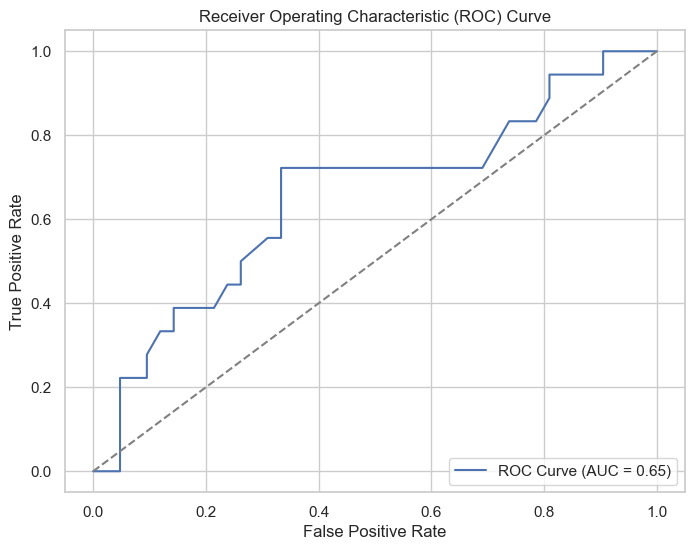

In [65]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# For ROC-AUC, you need predicted probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1 (Price Increase)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

# Generate a classification report for a detailed analysis
#print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [69]:
import seaborn as sns

In [72]:
data.columns

Index(['Headline', 'Sentiment', 'Stock Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Dividends', 'Stock Splits', 'Price Increase',
       'Previous_Close', '5_day_MA', '10_day_MA', '30_day_MA', 'Daily_Return',
       'Volatility', '5_day_Volume_MA', '10_day_Volume_MA', 'RSI'],
      dtype='object')

The correlation matrix provides insights into which features are strongly related, helping you decide which features might be redundant or useful for further analysis. Let me know if you need help interpreting the matrix or want to explore other ways of analyzing the data

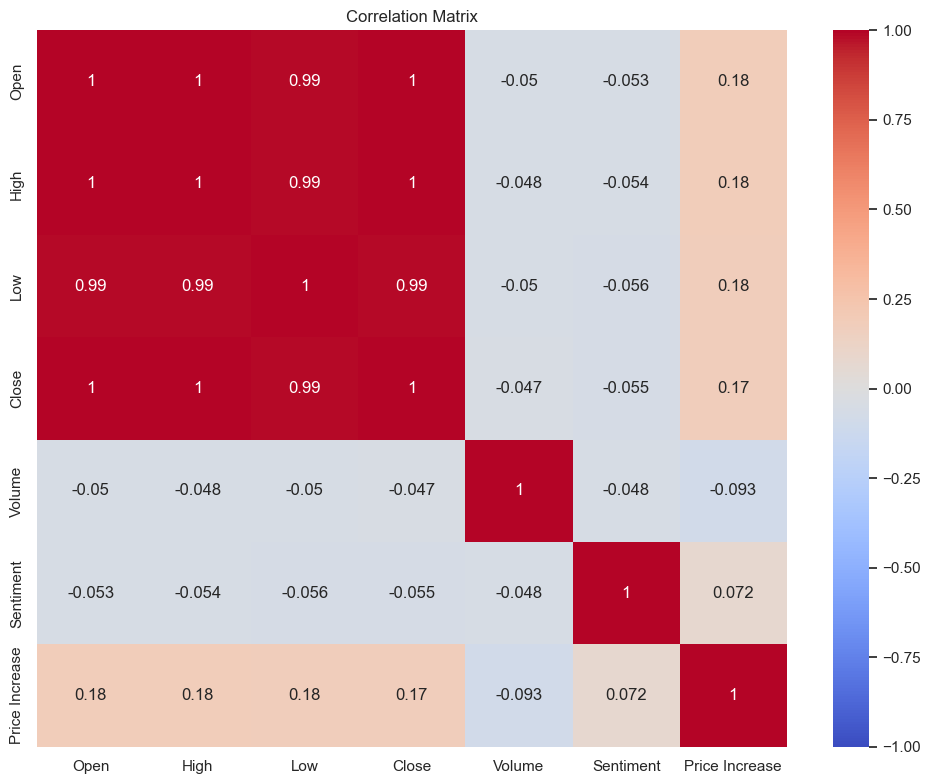

In [71]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment','Price Increase']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


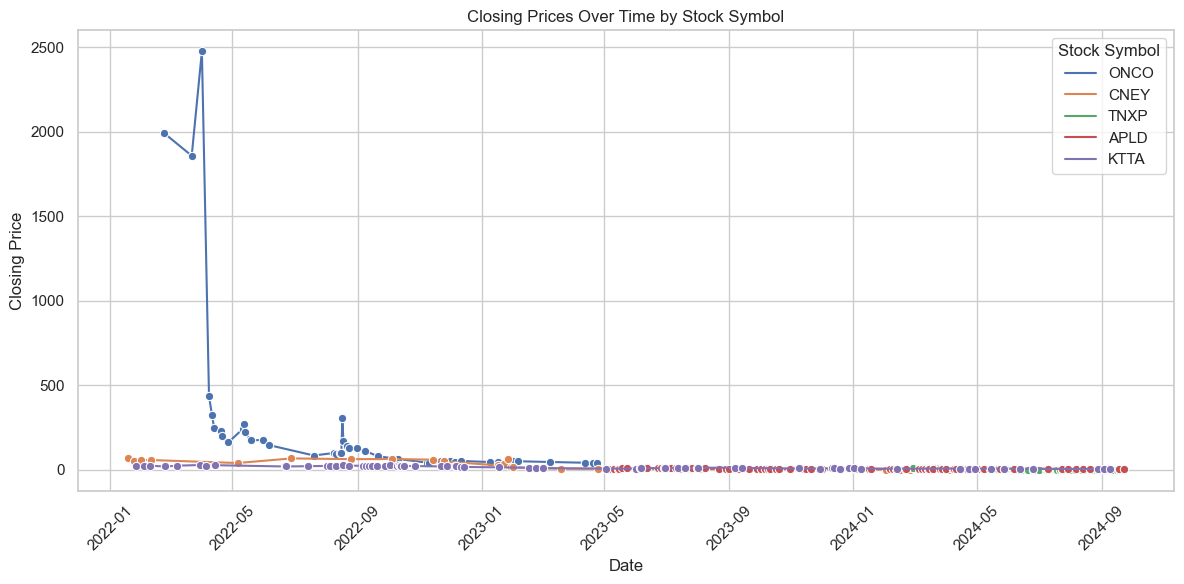

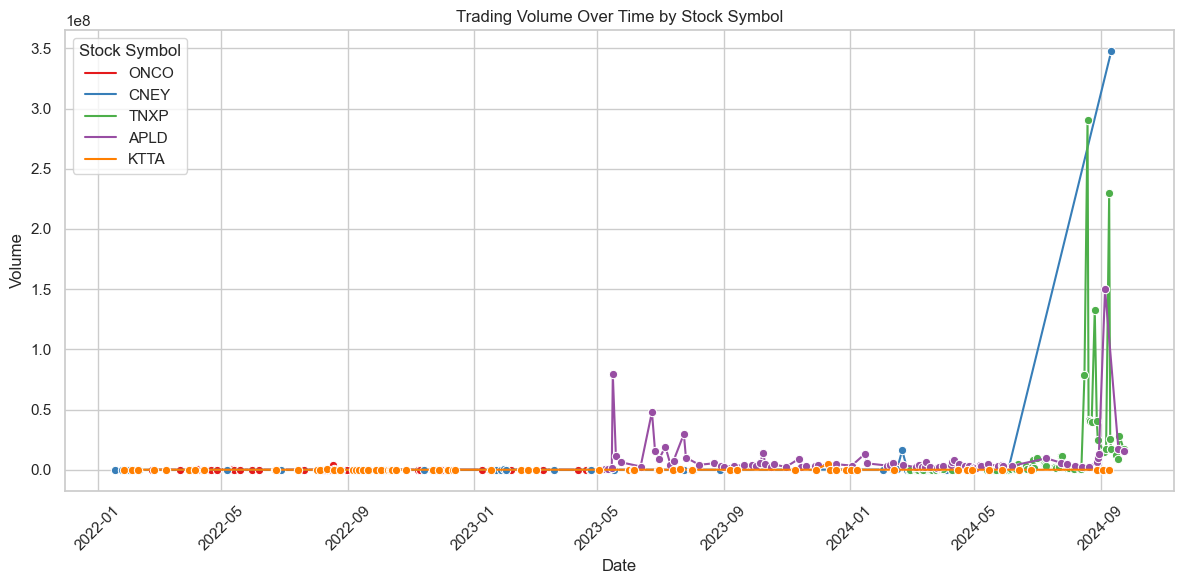

In [74]:

# Set style for the plots
sns.set(style="whitegrid")

# Plot 1: Line plot of closing prices over time, grouped by stock symbol
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', hue='Stock Symbol', data=data, marker='o')
plt.title('Closing Prices Over Time by Stock Symbol')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Line plot of trading volume over time, grouped by stock symbol
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', hue='Stock Symbol', data=data, marker='o', palette='Set1')
plt.title('Trading Volume Over Time by Stock Symbol')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



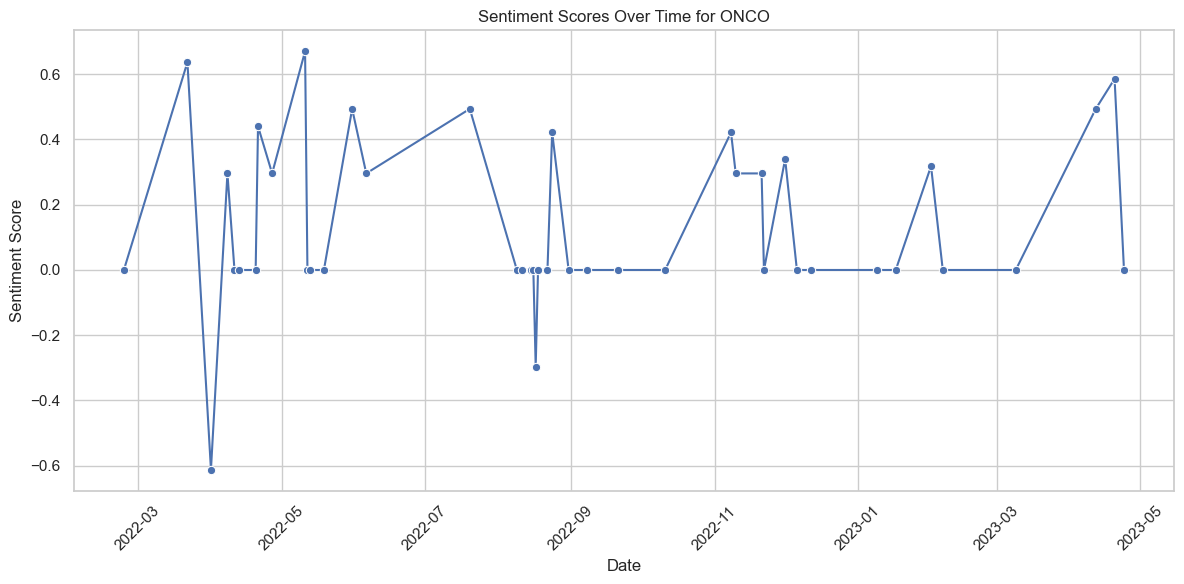

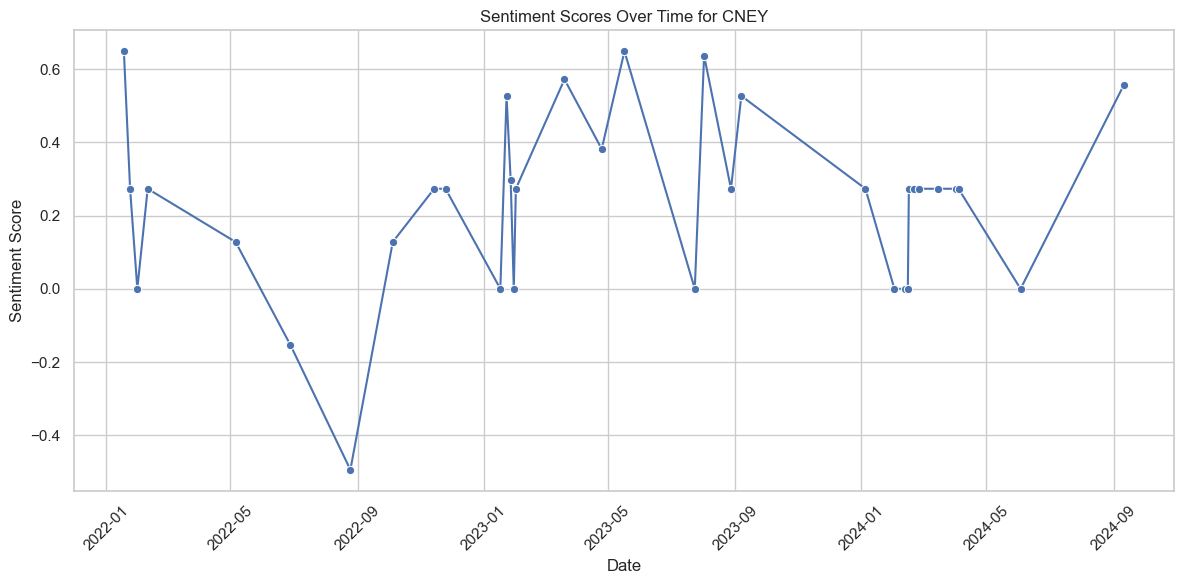

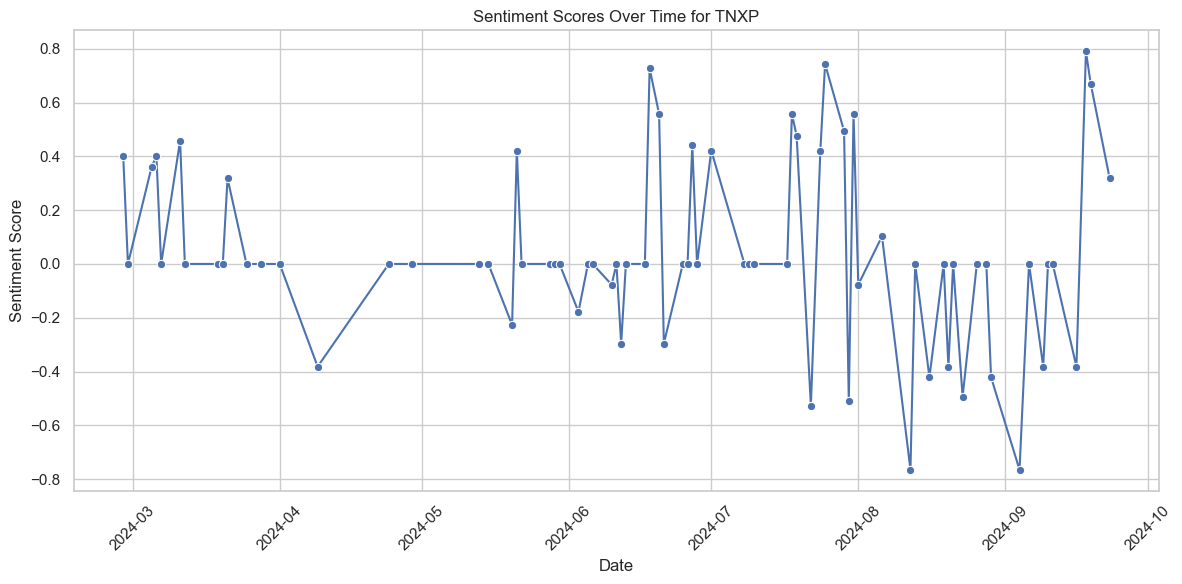

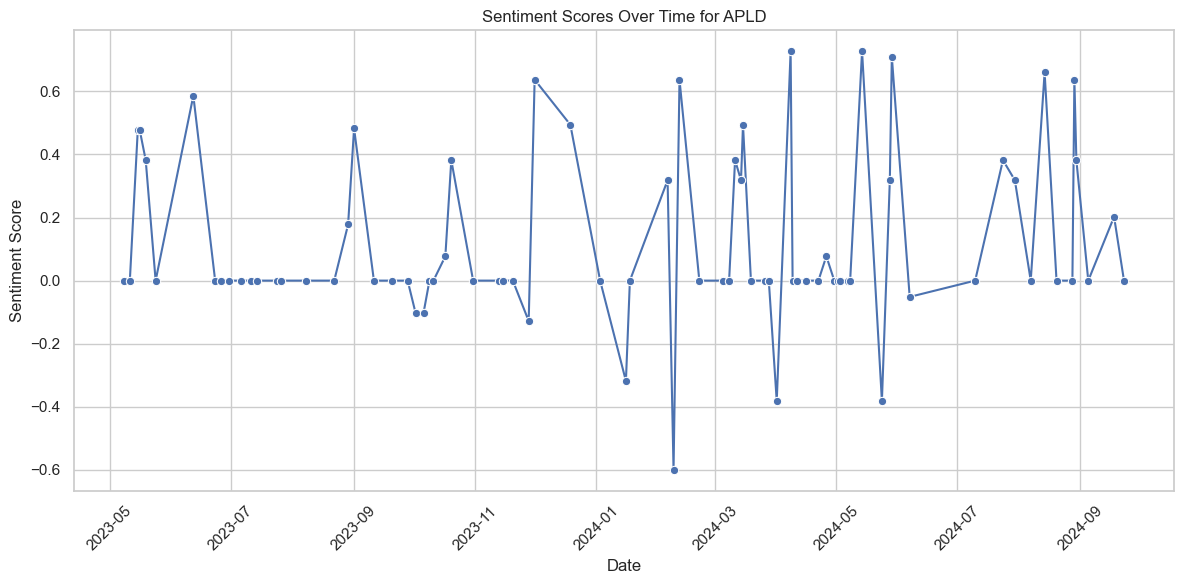

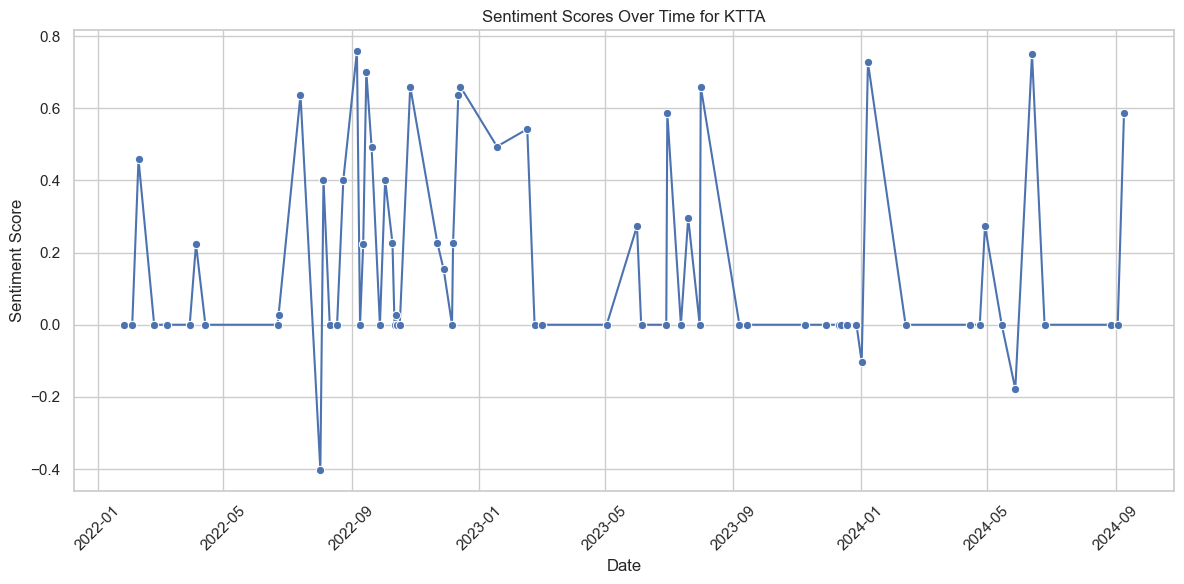

In [75]:
# Set the style for the plots
sns.set(style="whitegrid")

# Get the unique stock symbols
stock_symbols = data['Stock Symbol'].unique()

# Create a line plot for each stock symbol
for stock in stock_symbols:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Sentiment', data=data[data['Stock Symbol'] == stock], marker='o', palette='Set2')
    plt.title(f'Sentiment Scores Over Time for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Display the distribution of sentiment scores for each stock symbol, using violin plots to show the density and spread of the sentiment data



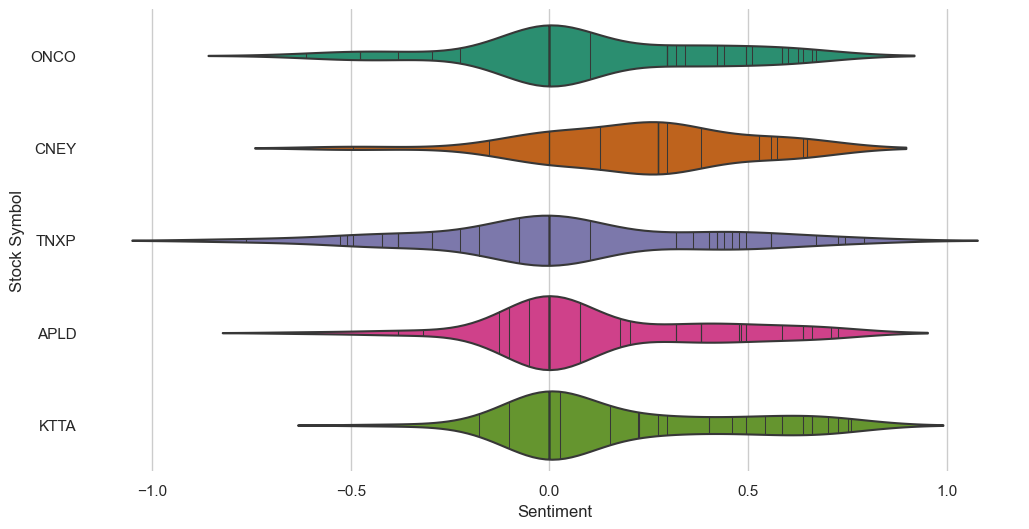

In [76]:
figsize = (12, 1.2 * len(data['Stock Symbol'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Data, x='Sentiment', y='Stock Symbol', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Forecasting future stock prices for each stock symbol.

In [77]:
!pip install pmdarima

In [78]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import warnings
import numpy as np

warnings.filterwarnings("ignore")

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


## Performs Seasonal and Trend decomposition using Loess (STL) to analyze the time series data for each stock symbol and generates a simple forecast for the year 2024 based on the trend component.


<Figure size 3000x1000 with 0 Axes>

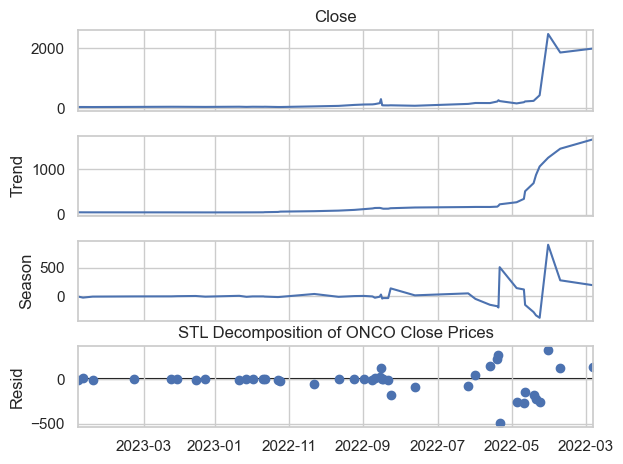

Forecasted Values for ONCO for 2024:
            Forecasted Trend
2024-01-01       1657.462518
2024-01-02       1657.462518
2024-01-03       1657.462518
2024-01-04       1657.462518
2024-01-05       1657.462518
...                      ...
2024-12-11       1657.462518
2024-12-12       1657.462518
2024-12-13       1657.462518
2024-12-16       1657.462518
2024-12-17       1657.462518

[252 rows x 1 columns]


<Figure size 3000x1000 with 0 Axes>

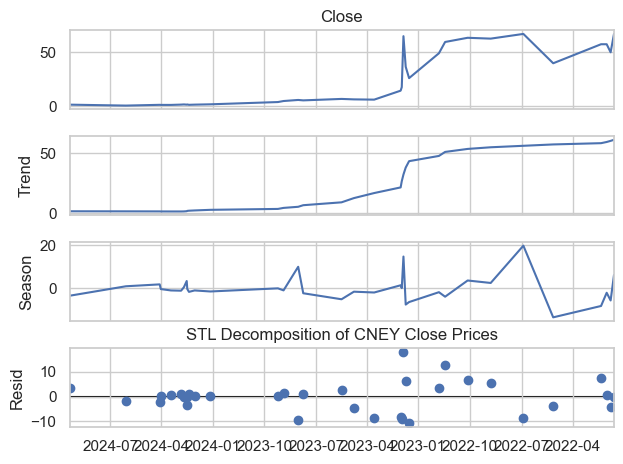

Forecasted Values for CNEY for 2024:
            Forecasted Trend
2024-01-01         61.057823
2024-01-02         61.057823
2024-01-03         61.057823
2024-01-04         61.057823
2024-01-05         61.057823
...                      ...
2024-12-11         61.057823
2024-12-12         61.057823
2024-12-13         61.057823
2024-12-16         61.057823
2024-12-17         61.057823

[252 rows x 1 columns]


<Figure size 3000x1000 with 0 Axes>

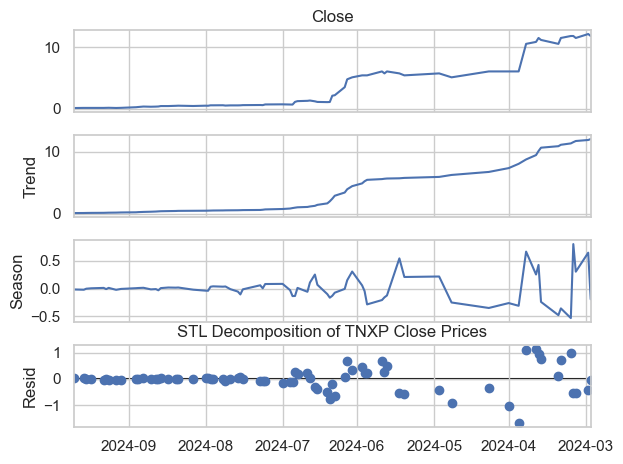

Forecasted Values for TNXP for 2024:
            Forecasted Trend
2024-01-01         12.075655
2024-01-02         12.075655
2024-01-03         12.075655
2024-01-04         12.075655
2024-01-05         12.075655
...                      ...
2024-12-11         12.075655
2024-12-12         12.075655
2024-12-13         12.075655
2024-12-16         12.075655
2024-12-17         12.075655

[252 rows x 1 columns]


<Figure size 3000x1000 with 0 Axes>

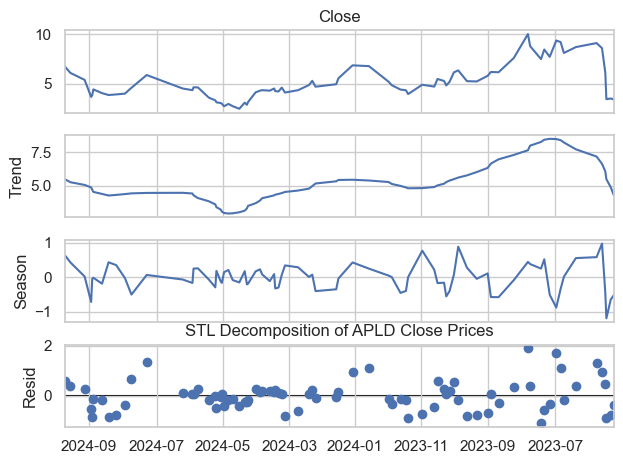

Forecasted Values for APLD for 2024:
            Forecasted Trend
2024-01-01          4.243196
2024-01-02          4.243196
2024-01-03          4.243196
2024-01-04          4.243196
2024-01-05          4.243196
...                      ...
2024-12-11          4.243196
2024-12-12          4.243196
2024-12-13          4.243196
2024-12-16          4.243196
2024-12-17          4.243196

[252 rows x 1 columns]


<Figure size 3000x1000 with 0 Axes>

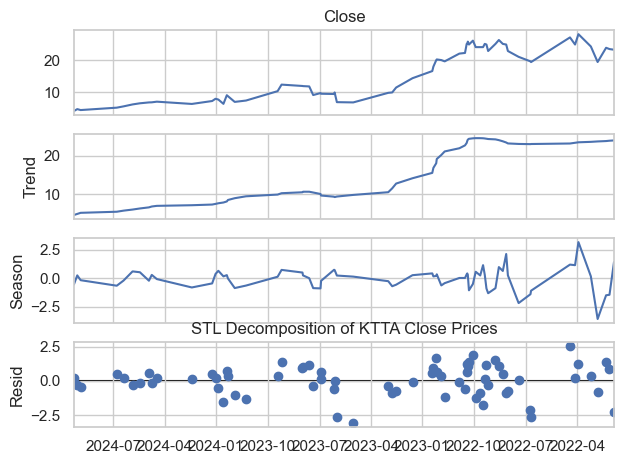

Forecasted Values for KTTA for 2024:
            Forecasted Trend
2024-01-01          24.06399
2024-01-02          24.06399
2024-01-03          24.06399
2024-01-04          24.06399
2024-01-05          24.06399
...                      ...
2024-12-11          24.06399
2024-12-12          24.06399
2024-12-13          24.06399
2024-12-16          24.06399
2024-12-17          24.06399

[252 rows x 1 columns]


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


# Get unique stock symbols
stock_symbols = data['Stock Symbol'].unique()

# Define the seasonal period based on your data
seasonal_period = 7  # Adjust according to your data's seasonal cycle

# Set forecast steps for the year 2024 (assuming business days)
forecast_steps = 252  # Approximately the number of business days in a year

# Loop through each stock symbol
for symbol in stock_symbols:
    # Filter the data for the current symbol
    close_prices = data[data['Stock Symbol'] == symbol]['Close'].dropna()

    # Ensure the data is long enough and has no missing values
    if len(close_prices) >= seasonal_period:
        # Perform STL Decomposition
        stl = STL(close_prices, period=seasonal_period)
        result = stl.fit()

        # Plot the decomposition
        plt.figure(figsize=(30, 10))
        result.plot()
        plt.title(f'STL Decomposition of {symbol} Close Prices')
        plt.show()

        # Forecasting using the trend component (simple extension)
        future_dates = pd.date_range(start='2024-01-01', periods=forecast_steps, freq='B')

        # Simple trend extension based on the last known trend value
        last_trend_value = result.trend.iloc[-1] if not result.trend.isnull().all() else None
        
        if last_trend_value is not None:
            trend_forecast = [last_trend_value] * forecast_steps
            forecast_df = pd.DataFrame(trend_forecast, index=future_dates, columns=['Forecasted Trend'])

            # Display forecasted values
            print(f"Forecasted Values for {symbol} for 2024:")
            print(forecast_df)
        else:
            print(f"No valid trend value for forecasting {symbol}.")
    else:
        print(f"Not enough data for {symbol} to perform STL decomposition.")


The observation of constant forecasted trends(STL) underscores the limitations of a naive forecasting approach. It highlights the necessity for more robust forecasting techniques that can adapt to the complex nature of stock price movements, ultimately leading to better insights and more informed decision-making.

# ARIMA (AutoRegressive Integrated Moving Average) model for each stock show the actual and forecasted prices over a period of time.

In [81]:
# Function to perform grid search and fit ARIMA model
def fit_arima_model(symbol, Data):
    best_aic = np.inf
    best_order = None
    best_model = None
    
    # Define the range of ARIMA (p, d, q) parameters to test
    p_values = range(0, 3)
    d_values = range(0, 2)
    q_values = range(0, 3)
    
    # Grid search for the best ARIMA model
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(Data, order=(p, d, q))
                    arima_result = model.fit()
                    aic = arima_result.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = arima_result
                except Exception as e:
                    continue

    return best_order, best_model


In [82]:
# Dictionary to store the best ARIMA models for each stock symbol
best_arima_models = {}


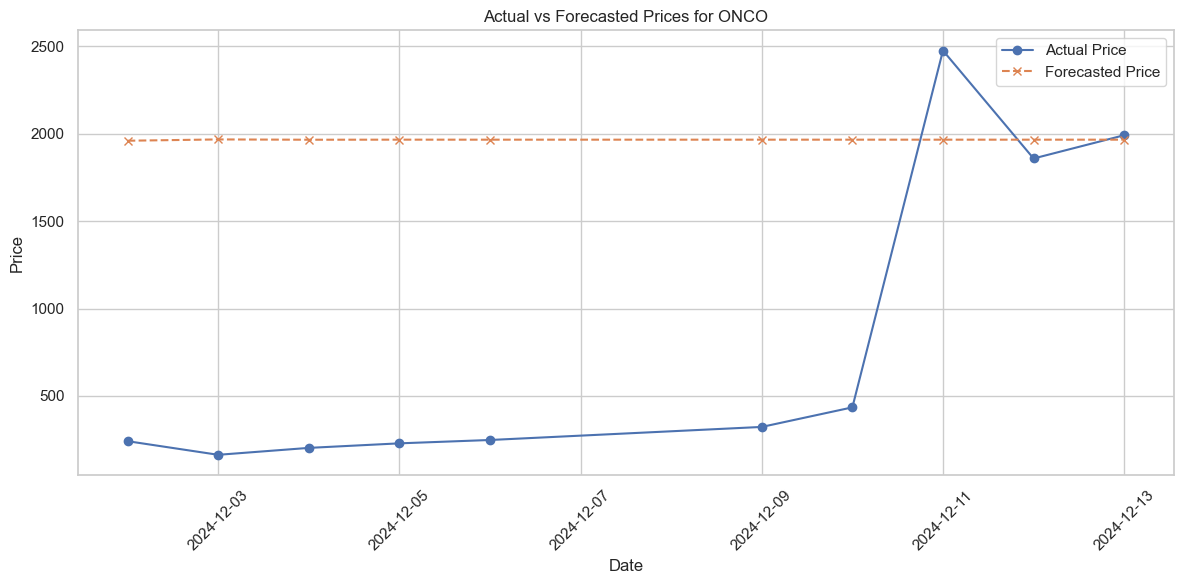


Actual and Forecasted Prices for ONCO:
          Date  Actual Price  Forecasted Price
43 2024-12-02    240.399994       1960.505417
44 2024-12-03    162.399994       1967.952182
45 2024-12-04    202.000000       1966.191425
46 2024-12-05    228.000000       1966.607749
47 2024-12-06    247.199997       1966.509311
48 2024-12-09    322.000000       1966.532586
49 2024-12-10    434.000000       1966.527083
50 2024-12-11   2476.800049       1966.528384
51 2024-12-12   1858.800049       1966.528076
52 2024-12-13   1992.000000       1966.528149
Best ARIMA Order for ONCO: (1, 1, 0)



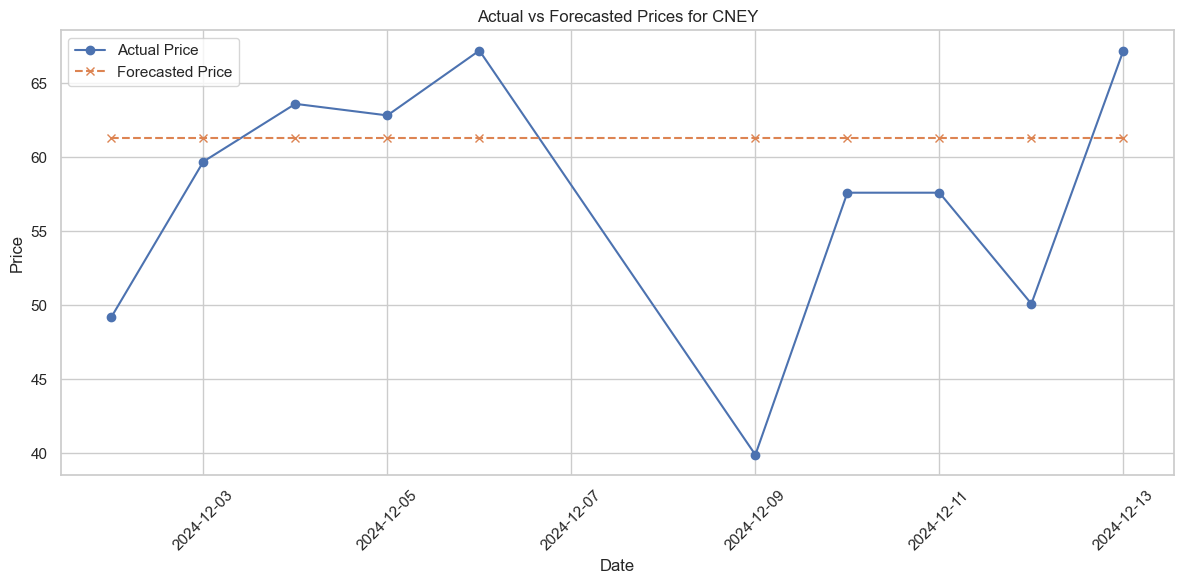


Actual and Forecasted Prices for CNEY:
          Date  Actual Price  Forecasted Price
34 2024-12-02     49.200001          61.28823
35 2024-12-03     59.700001          61.28823
36 2024-12-04     63.599998          61.28823
37 2024-12-05     62.820000          61.28823
38 2024-12-06     67.199997          61.28823
39 2024-12-09     39.900002          61.28823
40 2024-12-10     57.599998          61.28823
41 2024-12-11     57.599998          61.28823
42 2024-12-12     50.099998          61.28823
43 2024-12-13     67.199997          61.28823
Best ARIMA Order for CNEY: (0, 1, 1)



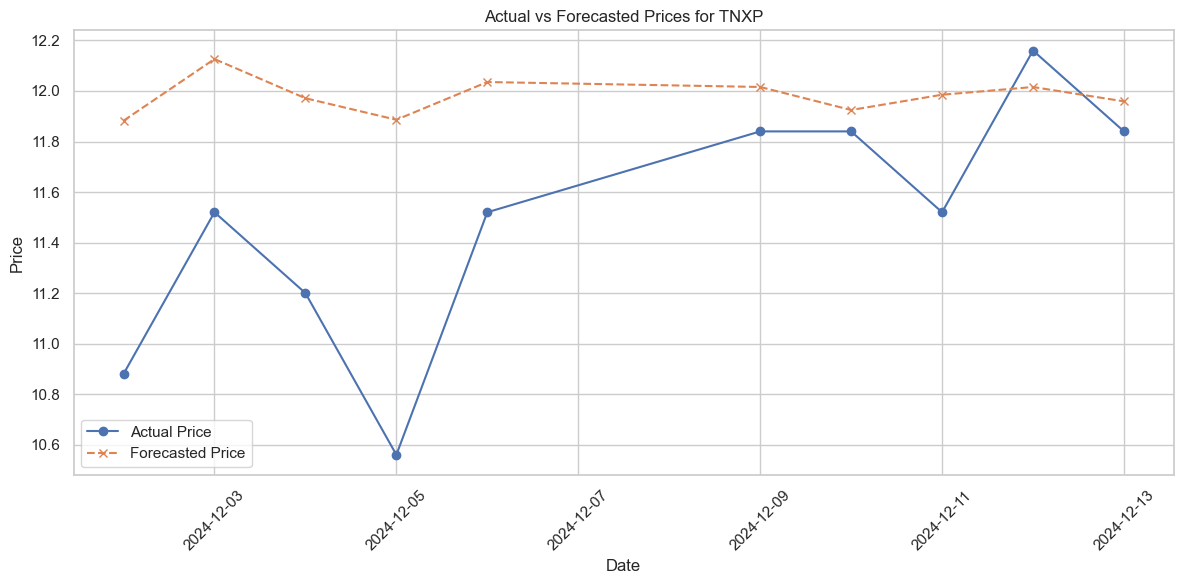


Actual and Forecasted Prices for TNXP:
          Date  Actual Price  Forecasted Price
73 2024-12-02         10.88         11.882379
74 2024-12-03         11.52         12.126351
75 2024-12-04         11.20         11.971238
76 2024-12-05         10.56         11.886070
77 2024-12-06         11.52         12.035409
78 2024-12-09         11.84         12.015837
79 2024-12-10         11.84         11.924665
80 2024-12-11         11.52         11.985164
81 2024-12-12         12.16         12.015679
82 2024-12-13         11.84         11.958832
Best ARIMA Order for TNXP: (2, 1, 2)



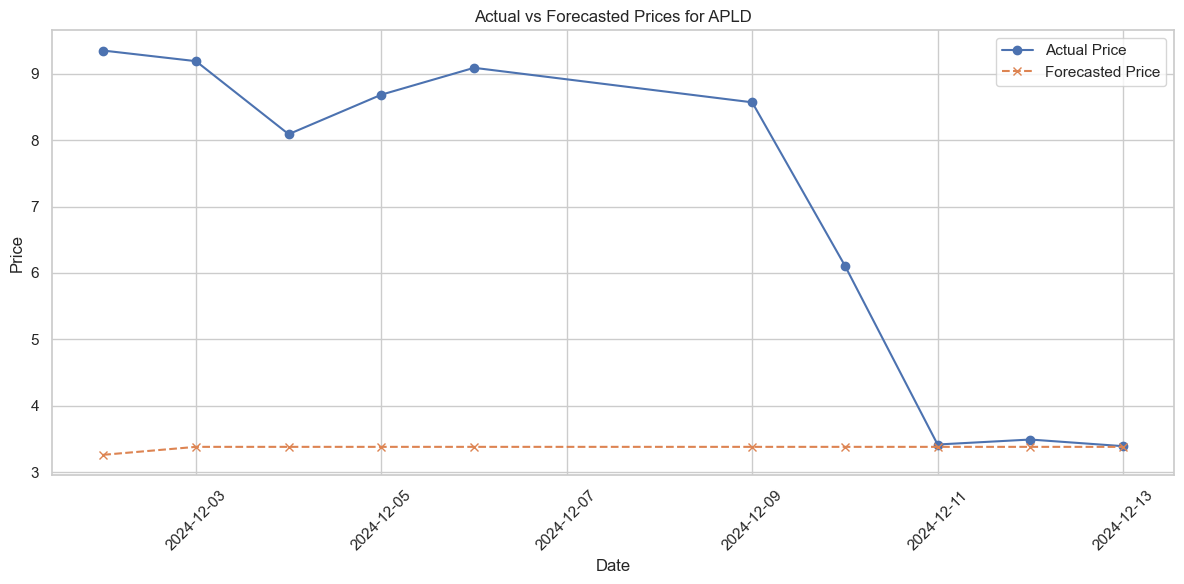


Actual and Forecasted Prices for APLD:
          Date  Actual Price  Forecasted Price
79 2024-12-02         9.350          3.259891
80 2024-12-03         9.190          3.379702
81 2024-12-04         8.090          3.379702
82 2024-12-05         8.685          3.379702
83 2024-12-06         9.090          3.379702
84 2024-12-09         8.570          3.379702
85 2024-12-10         6.110          3.379702
86 2024-12-11         3.415          3.379702
87 2024-12-12         3.490          3.379702
88 2024-12-13         3.390          3.379702
Best ARIMA Order for APLD: (0, 1, 2)



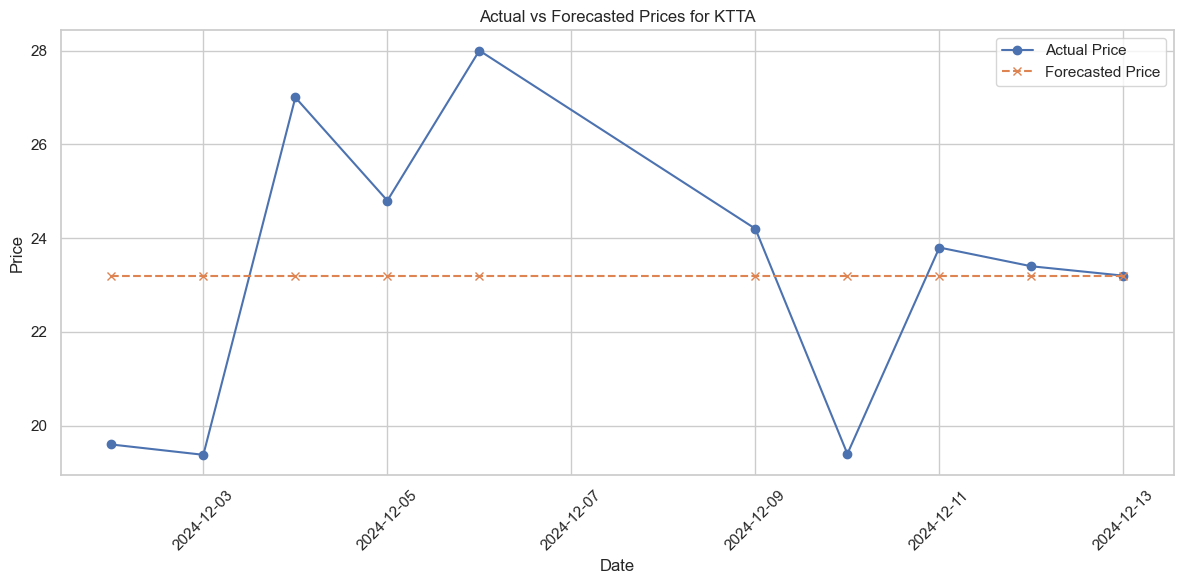


Actual and Forecasted Prices for KTTA:
          Date  Actual Price  Forecasted Price
70 2024-12-02     19.600000         23.200001
71 2024-12-03     19.379999         23.200001
72 2024-12-04     27.000000         23.200001
73 2024-12-05     24.799999         23.200001
74 2024-12-06     28.000000         23.200001
75 2024-12-09     24.200001         23.200001
76 2024-12-10     19.400000         23.200001
77 2024-12-11     23.799999         23.200001
78 2024-12-12     23.400000         23.200001
79 2024-12-13     23.200001         23.200001
Best ARIMA Order for KTTA: (0, 1, 0)



In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming fit_arima_model is defined elsewhere

forecast_steps = 10   # Number of days to forecast
best_arima_models = {}

for symbol in stock_symbols:
    # Filter the data for the current stock symbol
    stock_data = data[data['Stock Symbol'] == symbol]
    
    # Set 'Date' as index and sort by date
    #stock_data = stock_data.set_index('Date').sort_index()
    
    # Consider only the 'Close' price for time series
    close_prices = stock_data['Close']
    
    # Fit the best ARIMA model using grid search
    best_order, best_model = fit_arima_model(symbol, close_prices)
    
    # Store the result
    best_arima_models[symbol] = best_model
    
    # Forecast future prices
    forecast = best_model.forecast(steps=forecast_steps)
    
    # Generate the forecast date range starting from December 1, 2024
    forecast_dates = pd.date_range(start='2024-12-01', periods=forecast_steps, freq='B')  # 'B' for business days

    # Combine actual and forecasted prices
    actual_prices = close_prices[-forecast_steps:]  # Get the last actual prices for the same number of steps
    if len(actual_prices) < forecast_steps:
        actual_prices = pd.Series([None] * (forecast_steps - len(actual_prices)), index=forecast_dates[:forecast_steps-len(actual_prices)])
    
    combined_df = pd.DataFrame({
        'Date': forecast_dates,
        'Actual Price': actual_prices.values,
        'Forecasted Price': forecast
    })
    # Plot actual vs forecasted prices
    # Plot actual vs forecasted prices
    plt.figure(figsize=(12, 6))
    plt.plot(combined_df['Date'], combined_df['Actual Price'], label='Actual Price', marker='o')
    plt.plot(combined_df['Date'], combined_df['Forecasted Price'], label='Forecasted Price', marker='x', linestyle='--')
    plt.title(f'Actual vs Forecasted Prices for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


    # Print the combined DataFrame
    print(f"\nActual and Forecasted Prices for {symbol}:\n", combined_df)

   

    print(f"Best ARIMA Order for {symbol}: {best_order}\n")


## Overall Observation
Forecast Accuracy Varies by Stock: The models perform differently for each stock. For stocks like TNXP, the forecast is closer to actual prices, while for others like ONCO and CNEY, the forecasts are not accurate.
Stocks with high volatility, such as APLD and KTTA, tend to have poorer ARIMA model performance.